Import libraries required

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #to adjust the configuration of the plots


Read the dataset

In [2]:
movie_df_raw = pd.read_csv('movies.csv')

Explore the data

In [3]:
# movie_df_raw.shape  # check out the dimension of the dataset
# movie_df_raw.dtypes  # look at the data types for each column
# movie_df_raw.tail()  # read the last five rows
# movie_df_raw.columns.values  # return an array of column names
# movie_df_raw.columns.values.tolist() # return a list of column names

movie_df_raw.head()  # read the first five rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Check for missing data

In [4]:
#movie_df_raw.isnull() # checking missing values
#movie_df_raw.notnull() # checking non-missing values
#movie_df_raw.isnull().values.any() # only want to know if there are any missing values
movie_df_raw.isnull().sum()  # knowling number of missing values for each variable
#movie_df_raw.isnull().sum().sum()  # knowing how many missing values in the data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Drop the rows with NULL values

In [5]:
movie_df = movie_df_raw.dropna(axis = 0)
movie_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
#check the datatype of the columns
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#extract year from released

movie_df["corrected_year"] = movie_df['released'].str.extract(pat = '([0-9]{4})').astype('int')

movie_df[movie_df['year'] != movie_df['corrected_year']]['name']


C:\Users\Kopla_Jr\AppData\Local\Temp/ipykernel_4360/2118569426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["corrected_year"] = movie_df['released'].str.extract(pat = '([0-9]{4})').astype('int')


8                            Superman II
11                The Gods Must Be Crazy
21                         Heaven's Gate
33      Cattle Annie and Little Britches
96                         The Evil Dead
                      ...               
7427                        Stan & Ollie
7432            Dragon Ball Super: Broly
7462                                1917
7525                 Weathering with You
7604                              Mine 9
Name: name, Length: 708, dtype: object

In [8]:
#Change the values of year with corrected year

movie_df['year'] = movie_df["corrected_year"]
#movie_df[movie_df['year'] != movie_df['corrected_year']]['name']

#drop the corrected_year column

movie_df = movie_df.drop(['corrected_year'], axis = 1)
movie_df.head()

C:\Users\Kopla_Jr\AppData\Local\Temp/ipykernel_4360/781100582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['year'] = movie_df["corrected_year"]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Change the datatypes of columns

In [9]:
movie_df = movie_df.astype({"budget":"int64", "gross":"int64", "votes":"int64","year":"int64"})
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#Sort the movies on gross amount

#pd.set_option('display.max_rows', None) 

movie_df = movie_df.sort_values(by=['gross'], inplace=False, ascending=False)

Check for Duplicates

In [11]:
#find the number of duplicate rows in the dataframe
movie_df.duplicated().sum()

#if any duplicates are present run the below code
#   movie_df.drop_duplicates()

0

Checking for correlation between budget and all the numeric features in the dataset

In [12]:
#Check the correlation table
correlation_matrix = movie_df.corr(method='pearson') # Pearson, Kendall, Spearman



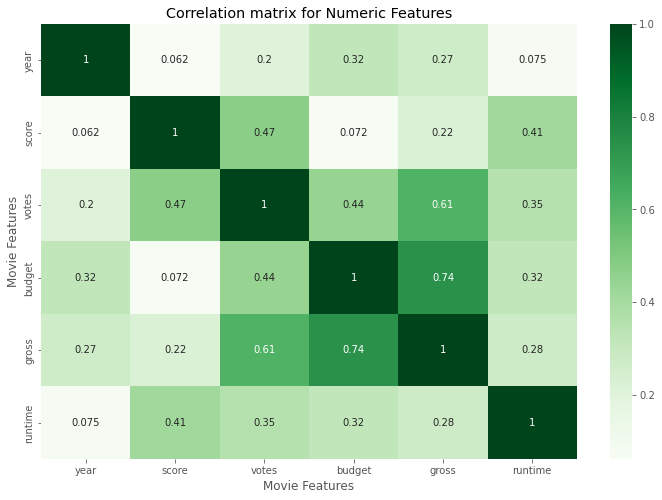

In [13]:
#Seaborn heatmap for the correlation matrix

sns.heatmap(correlation_matrix, annot=True, cmap="Greens")

plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


Find the correlation between gross earnings and all the possible features

In [14]:
#Find whether any other feature corresponds to high correlation with gross

# Numerize the object columns

movie_df_numerized = movie_df.copy()

for col in movie_df_numerized.columns:
    if(movie_df_numerized[col].dtype == 'object'):
        movie_df_numerized[col] = movie_df_numerized[col].astype('category')
        movie_df_numerized[col] = movie_df_numerized[col].cat.codes

movie_df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2015,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96.0
2434,2969,5,0,1994,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97.0
3681,1595,3,6,2001,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108.0
272,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85.0


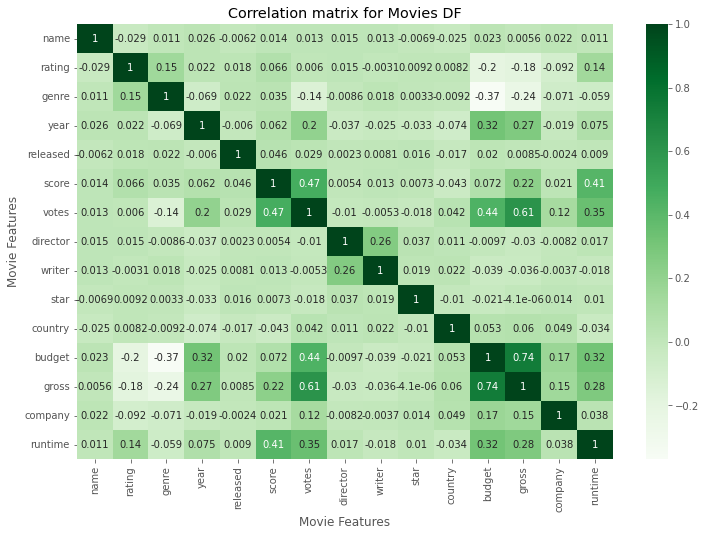

In [15]:
correlation_matrix_numerized = movie_df_numerized.corr(method='pearson')

#Seaborn heatmap of all the columns

sns.heatmap(correlation_matrix_numerized, annot=True, cmap="Greens")

plt.title('Correlation matrix for Movies DF')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [16]:
corr_mat_num_values = movie_df_numerized.corr()

corr_pair = corr_mat_num_values.unstack()
corr_pair

name     name        1.000000
         rating     -0.029234
         genre       0.010996
         year        0.025542
         released   -0.006152
                       ...   
runtime  country    -0.034477
         budget      0.318695
         gross       0.275796
         company     0.037585
         runtime     1.000000
Length: 225, dtype: float64

In [17]:
sorted_corr_pair =corr_pair.sort_values()
high_corr_pair = sorted_corr_pair[(sorted_corr_pair)>0.5]
high_corr_pair

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

<AxesSubplot:>

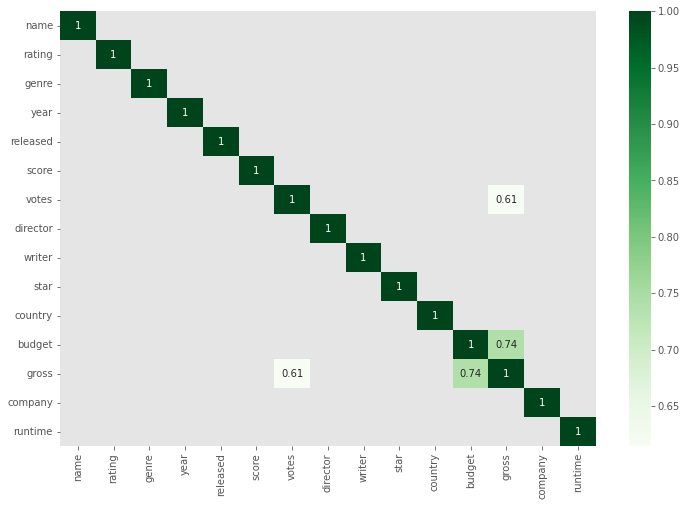

In [18]:
#visualizing the highest correlation pairs

corr_map = corr_mat_num_values[corr_mat_num_values>.5]
plt.figure(figsize=(12,8))
sns.heatmap(corr_map, annot = True, cmap="Greens")

#sns.heatmap(corr_map, cmap="Greens")


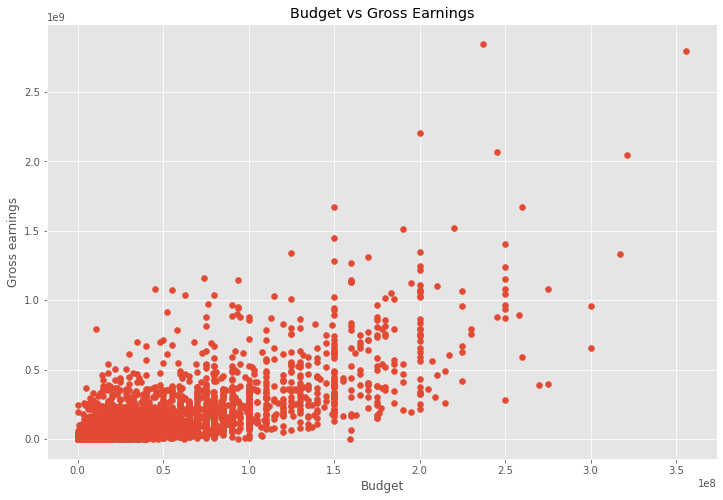

In [19]:
# scatter plot to check budget vs gross

plt.scatter(x = movie_df['budget'], y = movie_df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

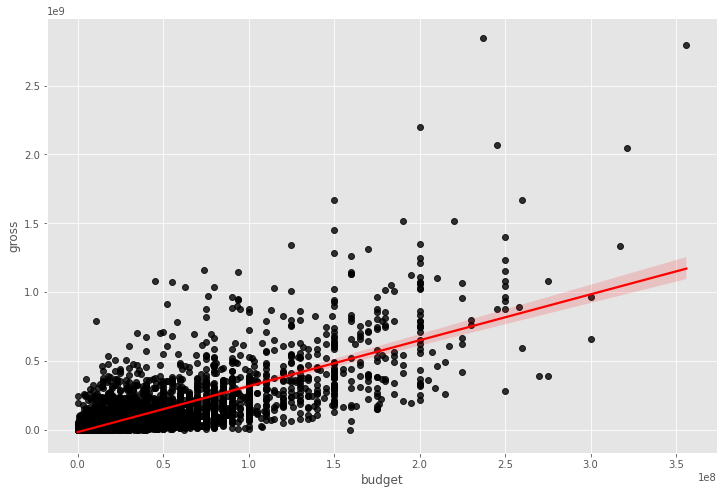

In [20]:
#budget vs gross correlation using seaborn
sns.regplot(x = 'budget', y = 'gross', data = movie_df, scatter_kws = {'color' : 'black'}, line_kws = {'color' : 'red'})